✅ Task 1: EDA & Preprocessing Implementation

1. Jupyter Notebook: notebooks/01_eda_preprocessing.ipynb

In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

tqdm.pandas()

# 📂 Load Data
df = pd.read_csv("../data/raw/complaints.csv")

# 🧼 Rename columns to make referencing easier
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 👀 Preview
print("Shape:", df.shape)
df.head()


C:\Users\ads\AppData\Local\Temp\ipykernel_10476\3140599687.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


Shape: (9609797, 18)


,date_received,product,sub-product,issue,sub-issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


 2. Distribution of Complaints by Product

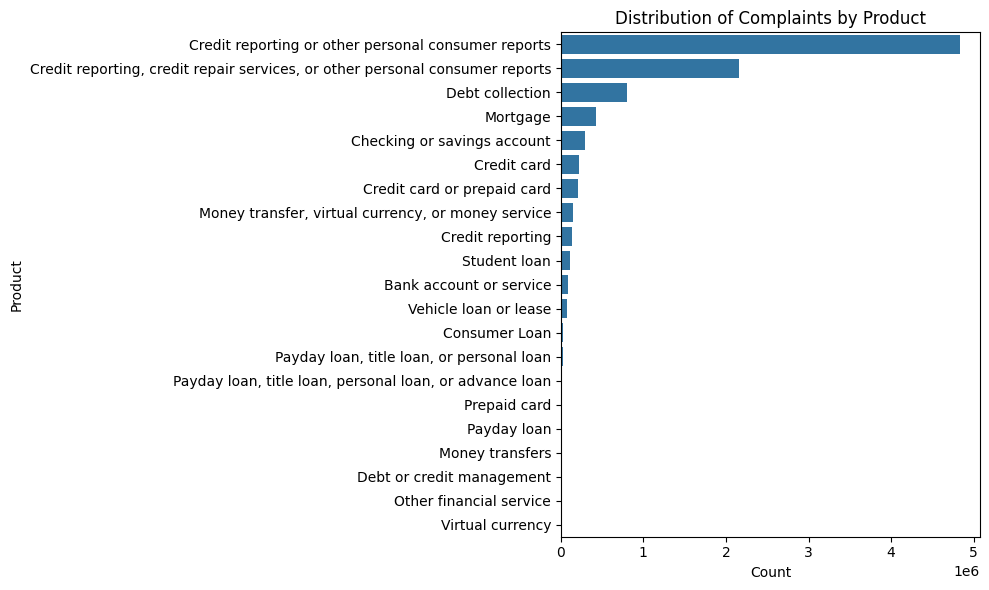

In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="product", order=df["product"].value_counts().index)
plt.title("Distribution of Complaints by Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


 3. Filter Relevant Product Categories

In [3]:
target_products = [
    "Credit card", 
    "Personal loan", 
    "Buy Now, Pay Later (BNPL)", 
    "Savings account", 
    "Money transfers"
]

df_filtered = df[df["product"].isin(target_products)]
df_filtered = df_filtered[df_filtered["consumer_complaint_narrative"].notna()]

print("Filtered shape:", df_filtered.shape)


Filtered shape: (82164, 18)


4. Text Cleaning Function

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # remove special characters
    text = re.sub(r"\s+", " ", text).strip() # remove extra spaces
    return text

df_filtered["cleaned_narrative"] = df_filtered["consumer_complaint_narrative"].progress_apply(clean_text)


100%|██████████| 82164/82164 [00:34<00:00, 2394.87it/s]


 5. Complaint Narrative Length Analysis

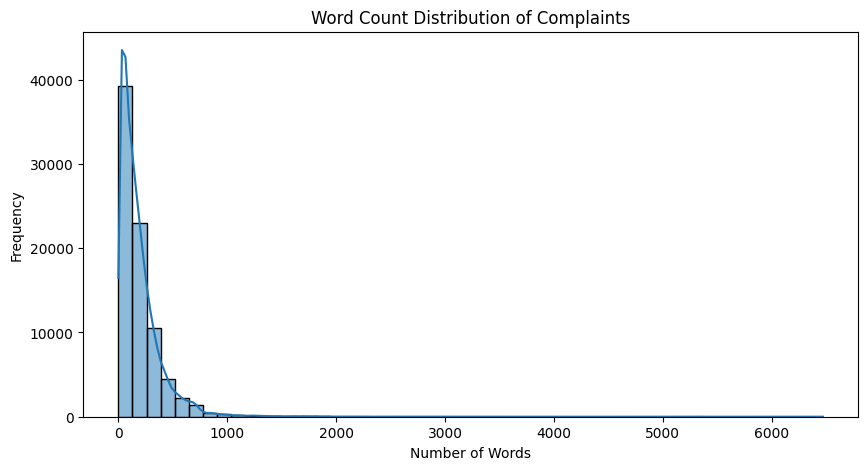

In [5]:
df_filtered["word_count"] = df_filtered["cleaned_narrative"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df_filtered["word_count"], bins=50, kde=True)
plt.title("Word Count Distribution of Complaints")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


 6. Save Cleaned Dataset

In [6]:
df_filtered.to_csv("../data/processed/filtered_complaints.csv", index=False)
print("✅ Saved to ../data/processed/filtered_complaints.csv")


✅ Saved to ../data/processed/filtered_complaints.csv
